## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# Disable GPU
#os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 76s 0us/step


In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [6]:
## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = [0.1,0.5,0.95,0.99]

In [7]:
results = {}
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    for m in MOMENTUM:
        for n in [True, False]:
            optimizer = keras.optimizers.SGD(lr=lr, nesterov=n, momentum=m)
            model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

            model.fit(x_train, y_train, 
                      epochs=EPOCHS, 
                      batch_size=BATCH_SIZE, 
                      validation_data=(x_test, y_test), 
                      shuffle=True)

            # Collect results
            train_loss = model.history.history["loss"]
            valid_loss = model.history.history["val_loss"]
            train_acc = model.history.history["acc"]
            valid_acc = model.history.history["val_acc"]

            exp_name_tag = "exp-lr-%s-mom-%s-nesterov-%s" % (str(lr),str(m),str(n))
            results[exp_name_tag] = {'train-loss': train_loss,
                                     'valid-loss': valid_loss,
                                     'train-acc': train_acc,
                                     'valid-acc': valid_acc}


Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

50000/50000 [==============================] - 1s 19us/step - loss: 0.6594 - acc: 0.7651 - val_loss: 2.2029 - val_acc: 0.4385
Epoch 3/50
50000/50000 [==============================] - 1s 16us/step - loss: 0.6695 - acc: 0.7645 - val_loss: 2.0676 - val_acc: 0.4451
Epoch 4/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.6388 - acc: 0.7722 - val_loss: 1.7631 - val_acc: 0.5072
Epoch 5/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.6186 - acc: 0.7791 - val_loss: 1.8769 - val_acc: 0.4869
Epoch 6/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.6059 - acc: 0.7840 - val_loss: 1.8777 - val_acc: 0.4762
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.5881 - acc: 0.7917 - val_loss: 1.8003 - val_acc: 0.5021
Epoch 8/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.5717 - acc: 0.7954 - val_loss: 1.8262 - val_acc: 0.5079
Epoch 9/50
50000/50000 [============================

50000/50000 [==============================] - 1s 21us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/50
50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/50
50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/50
50000/50000 [==============================] - 1s 21us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/50
50000/50000 [==============================] - 1s 23us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/50
50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/50
50000/50000 [=======

50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/50
50000/50000 [==============================] - 1s 15us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 21/50
50000/50000 [==============================] - 1s 15us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 22/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 23/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 24/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 25/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 26/50
50000/50000 [=======

50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 28/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 29/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 30/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 31/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 32/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 33/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 34/50
50000/50000 [=======

50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 36/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [=======

50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [=======

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.0523 - acc: 0.2689 - val_loss: 1.9206 - val_acc: 0.3061
Epoch 2/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.8717 - acc: 0.3376 - val_loss: 1.8860 - val_acc: 0.3138
Epoch 3/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.8067 - acc: 0.3635 - val_loss: 1.9214 - val_acc: 0.3044
Epoch 4/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.7591 - acc: 0.3811 - val_loss: 1.7391 - val_acc: 0.3878
Epoch 5/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.7218 - acc: 0.3949 - val_loss: 1.7011 - val_acc: 0.3964
Epoch 6/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.6824 - acc: 0.4073 - val_loss: 1.7467 - val_acc: 0.3881
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.6604 - acc: 0.4157 - val_loss: 1.6507 - val_acc

Epoch 10/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.1256 - acc: 0.6087 - val_loss: 1.4530 - val_acc: 0.4957
Epoch 11/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.1207 - acc: 0.6071 - val_loss: 1.3540 - val_acc: 0.5227
Epoch 12/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.1106 - acc: 0.6134 - val_loss: 1.4948 - val_acc: 0.4893
Epoch 13/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.1097 - acc: 0.6133 - val_loss: 1.3789 - val_acc: 0.5205
Epoch 14/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.1037 - acc: 0.6167 - val_loss: 1.5545 - val_acc: 0.4673
Epoch 15/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.0923 - acc: 0.6192 - val_loss: 1.3780 - val_acc: 0.5144
Epoch 16/50
50000/50000 [==============================] - 1s 16us/step - loss: 1.0888 - acc: 0.6217 - val_loss: 1.4191 - val_acc: 0.5009
Epoch 17/50
50000/50000 [=========

50000/50000 [==============================] - 1s 17us/step - loss: 0.8232 - acc: 0.7137 - val_loss: 1.5987 - val_acc: 0.4947
Epoch 20/50
50000/50000 [==============================] - 1s 16us/step - loss: 0.7986 - acc: 0.7240 - val_loss: 1.4242 - val_acc: 0.5307
Epoch 21/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.8018 - acc: 0.7217 - val_loss: 1.4169 - val_acc: 0.5278
Epoch 22/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.7908 - acc: 0.7273 - val_loss: 1.6437 - val_acc: 0.4750
Epoch 23/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.7773 - acc: 0.7287 - val_loss: 1.4545 - val_acc: 0.5278
Epoch 24/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.7712 - acc: 0.7333 - val_loss: 1.7548 - val_acc: 0.4638
Epoch 25/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.7615 - acc: 0.7355 - val_loss: 1.7378 - val_acc: 0.4940
Epoch 26/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 18us/step - loss: 0.2810 - acc: 0.9089 - val_loss: 2.2639 - val_acc: 0.5125
Epoch 29/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2646 - acc: 0.9159 - val_loss: 2.2487 - val_acc: 0.5076
Epoch 30/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2632 - acc: 0.9140 - val_loss: 2.0299 - val_acc: 0.5297
Epoch 31/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2629 - acc: 0.9152 - val_loss: 2.0731 - val_acc: 0.5296
Epoch 32/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2466 - acc: 0.9219 - val_loss: 2.1140 - val_acc: 0.5250
Epoch 33/50
50000/50000 [==============================] - 1s 25us/step - loss: 0.2494 - acc: 0.9204 - val_loss: 2.0587 - val_acc: 0.5315
Epoch 34/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.2352 - acc: 0.9261 - val_loss: 2.2281 - val_acc: 0.5037
Epoch 35/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 20us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 37/50
50000/50000 [==============================] - 1s 23us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 38/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 39/50
50000/50000 [==============================] - 1s 19us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 40/50
50000/50000 [==============================] - 1s 21us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 43/50
50000/50000 [=======

50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 47/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 48/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Train on 50000 samples, validate

Epoch 2/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/50
50000/50000 [==============================] - 1s 18us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/50
50000/50000 [==============================] - 1s 16us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/50
50000/50000 [==============================] - 1s 17us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/50
50000/50000 [===

Epoch 3/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.1035 - acc: 0.2401 - val_loss: 2.0825 - val_acc: 0.2491
Epoch 4/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.0592 - acc: 0.2601 - val_loss: 2.0431 - val_acc: 0.2708
Epoch 5/50
50000/50000 [==============================] - 1s 21us/step - loss: 2.0231 - acc: 0.2790 - val_loss: 2.0110 - val_acc: 0.2896
Epoch 6/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.9935 - acc: 0.2928 - val_loss: 1.9845 - val_acc: 0.2997
Epoch 7/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.9682 - acc: 0.3065 - val_loss: 1.9616 - val_acc: 0.3042
Epoch 8/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.9457 - acc: 0.3172 - val_loss: 1.9402 - val_acc: 0.3145
Epoch 9/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.9256 - acc: 0.3246 - val_loss: 1.9214 - val_acc: 0.3275
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 1s 20us/step - loss: 1.6195 - acc: 0.4364 - val_loss: 1.6284 - val_acc: 0.4299
Epoch 13/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.6168 - acc: 0.4363 - val_loss: 1.6256 - val_acc: 0.4304
Epoch 14/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.6136 - acc: 0.4369 - val_loss: 1.6241 - val_acc: 0.4313
Epoch 15/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.6106 - acc: 0.4367 - val_loss: 1.6228 - val_acc: 0.4335
Epoch 16/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.6084 - acc: 0.4399 - val_loss: 1.6208 - val_acc: 0.4286
Epoch 17/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.6057 - acc: 0.4392 - val_loss: 1.6197 - val_acc: 0.4335
Epoch 18/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.6028 - acc: 0.4417 - val_loss: 1.6145 - val_acc: 0.4338
Epoch 19/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 21us/step - loss: 1.4620 - acc: 0.4904 - val_loss: 1.5136 - val_acc: 0.4655
Epoch 22/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4587 - acc: 0.4903 - val_loss: 1.5056 - val_acc: 0.4646
Epoch 23/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4564 - acc: 0.4901 - val_loss: 1.4965 - val_acc: 0.4704
Epoch 24/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.4528 - acc: 0.4938 - val_loss: 1.4924 - val_acc: 0.4731
Epoch 25/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4505 - acc: 0.4931 - val_loss: 1.4958 - val_acc: 0.4699
Epoch 26/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4469 - acc: 0.4954 - val_loss: 1.4935 - val_acc: 0.4714
Epoch 27/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.4440 - acc: 0.4958 - val_loss: 1.4930 - val_acc: 0.4723
Epoch 28/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 17us/step - loss: 1.3057 - acc: 0.5434 - val_loss: 1.4077 - val_acc: 0.4991
Epoch 31/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.3043 - acc: 0.5441 - val_loss: 1.4085 - val_acc: 0.5029
Epoch 32/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.3008 - acc: 0.5459 - val_loss: 1.3981 - val_acc: 0.5022
Epoch 33/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.2992 - acc: 0.5463 - val_loss: 1.4015 - val_acc: 0.5035
Epoch 34/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.2961 - acc: 0.5463 - val_loss: 1.4043 - val_acc: 0.4968
Epoch 35/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.2943 - acc: 0.5477 - val_loss: 1.3986 - val_acc: 0.5032
Epoch 36/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.2930 - acc: 0.5484 - val_loss: 1.4035 - val_acc: 0.5007
Epoch 37/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 18us/step - loss: 0.7949 - acc: 0.7201 - val_loss: 1.6655 - val_acc: 0.4896
Epoch 40/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.7836 - acc: 0.7255 - val_loss: 1.6799 - val_acc: 0.4897
Epoch 41/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.7790 - acc: 0.7273 - val_loss: 1.4491 - val_acc: 0.5327
Epoch 42/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.7575 - acc: 0.7382 - val_loss: 1.5181 - val_acc: 0.5217
Epoch 43/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.7494 - acc: 0.7374 - val_loss: 1.4825 - val_acc: 0.5354
Epoch 44/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.7409 - acc: 0.7423 - val_loss: 1.5484 - val_acc: 0.5224
Epoch 45/50
50000/50000 [==============================] - 1s 21us/step - loss: 0.7287 - acc: 0.7457 - val_loss: 1.6158 - val_acc: 0.5079
Epoch 46/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 20us/step - loss: 0.4236 - acc: 0.8519 - val_loss: 1.9563 - val_acc: 0.5219
Epoch 49/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.3704 - acc: 0.8747 - val_loss: 2.0119 - val_acc: 0.5201
Epoch 50/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.4074 - acc: 0.8572 - val_loss: 2.0442 - val_acc: 0.5185
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.4928 - acc: 0.8267 - val_loss: 2.2032 - val_acc: 0.4688
Epoch 2/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.7728 - acc: 0.7241 - val_loss: 1.8008 - val_acc: 0.4963
Epoch 3/50
50000/50000 [==============================] - 1s 23us/step - loss: 0.8139 - acc: 0.7055 - val_loss: 1.7256 - val_acc: 0.5114
Epoch 4/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.7731 - acc: 0.7201 - val_loss: 1.7290 - val_acc: 0.5084


Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.5196 - acc: 0.8113 - val_loss: 2.1909 - val_acc: 0.5150
Epoch 8/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.4739 - acc: 0.8302 - val_loss: 2.1565 - val_acc: 0.5156
Epoch 9/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.4909 - acc: 0.8229 - val_loss: 2.2000 - val_acc: 0.5081
Epoch 10/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.4692 - acc: 0.8316 - val_loss: 2.1731 - val_acc: 0.5122
Epoch 11/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.4565 - acc: 0.8352 - val_loss: 2.2932 - val_acc: 0.5113
Epoch 12/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.3990 - acc: 0.8546 - val_loss: 2.2839 - val_acc: 0.5115
Epoch 13/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.4046 - acc: 0.8518 - val_loss: 2.3260 - val_acc: 0.5164
Epoch 14/50
50000/50000 [============

50000/50000 [==============================] - 1s 19us/step - loss: 2.2309 - acc: 0.1818 - val_loss: 2.2255 - val_acc: 0.1918
Epoch 9/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.2211 - acc: 0.1927 - val_loss: 2.2161 - val_acc: 0.1999
Epoch 10/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.2119 - acc: 0.2002 - val_loss: 2.2071 - val_acc: 0.2074
Epoch 11/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.2031 - acc: 0.2075 - val_loss: 2.1986 - val_acc: 0.2135
Epoch 12/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.1947 - acc: 0.2134 - val_loss: 2.1906 - val_acc: 0.2179
Epoch 13/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.1867 - acc: 0.2184 - val_loss: 2.1827 - val_acc: 0.2197
Epoch 14/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.1789 - acc: 0.2225 - val_loss: 2.1751 - val_acc: 0.2230
Epoch 15/50
50000/50000 [======================

50000/50000 [==============================] - 1s 17us/step - loss: 1.9622 - acc: 0.3054 - val_loss: 1.9649 - val_acc: 0.2984
Epoch 18/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.9598 - acc: 0.3063 - val_loss: 1.9626 - val_acc: 0.2994
Epoch 19/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.9575 - acc: 0.3067 - val_loss: 1.9603 - val_acc: 0.3013
Epoch 20/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.9552 - acc: 0.3081 - val_loss: 1.9581 - val_acc: 0.3025
Epoch 21/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.9530 - acc: 0.3090 - val_loss: 1.9559 - val_acc: 0.3037
Epoch 22/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.9508 - acc: 0.3109 - val_loss: 1.9539 - val_acc: 0.3046
Epoch 23/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.9486 - acc: 0.3114 - val_loss: 1.9517 - val_acc: 0.3069
Epoch 24/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 18us/step - loss: 1.8423 - acc: 0.3609 - val_loss: 1.8472 - val_acc: 0.3573
Epoch 27/50
50000/50000 [==============================] - ETA: 0s - loss: 1.8405 - acc: 0.362 - 1s 19us/step - loss: 1.8405 - acc: 0.3622 - val_loss: 1.8455 - val_acc: 0.3575
Epoch 28/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.8388 - acc: 0.3624 - val_loss: 1.8438 - val_acc: 0.3581
Epoch 29/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.8371 - acc: 0.3622 - val_loss: 1.8421 - val_acc: 0.3586
Epoch 30/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.8354 - acc: 0.3631 - val_loss: 1.8405 - val_acc: 0.3596
Epoch 31/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.8338 - acc: 0.3638 - val_loss: 1.8388 - val_acc: 0.3611
Epoch 32/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.8320 - acc: 0.3649 - val_loss: 1.8372 - val_acc: 0.3630
Epoch 33

Epoch 35/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.7618 - acc: 0.3861 - val_loss: 1.7677 - val_acc: 0.3851
Epoch 36/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.7607 - acc: 0.3868 - val_loss: 1.7666 - val_acc: 0.3835
Epoch 37/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.7596 - acc: 0.3872 - val_loss: 1.7658 - val_acc: 0.3840
Epoch 38/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.7585 - acc: 0.3874 - val_loss: 1.7646 - val_acc: 0.3858
Epoch 39/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.7575 - acc: 0.3883 - val_loss: 1.7634 - val_acc: 0.3861
Epoch 40/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.7564 - acc: 0.3882 - val_loss: 1.7624 - val_acc: 0.3863
Epoch 41/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.7552 - acc: 0.3888 - val_loss: 1.7613 - val_acc: 0.3868
Epoch 42/50
50000/50000 [=========

50000/50000 [==============================] - 1s 18us/step - loss: 1.5059 - acc: 0.4747 - val_loss: 1.5320 - val_acc: 0.4570
Epoch 45/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5031 - acc: 0.4748 - val_loss: 1.5280 - val_acc: 0.4594
Epoch 46/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.4992 - acc: 0.4758 - val_loss: 1.5263 - val_acc: 0.4590
Epoch 47/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.4950 - acc: 0.4767 - val_loss: 1.5238 - val_acc: 0.4603
Epoch 48/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.4924 - acc: 0.4778 - val_loss: 1.5217 - val_acc: 0.4609
Epoch 49/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.4894 - acc: 0.4792 - val_loss: 1.5202 - val_acc: 0.4613
Epoch 50/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.4855 - acc: 0.4814 - val_loss: 1.5148 - val_acc: 0.4609
Train on 50000 samples, validate on 10000 samp

Epoch 3/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.3274 - acc: 0.5333 - val_loss: 1.4061 - val_acc: 0.4981
Epoch 4/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.3166 - acc: 0.5385 - val_loss: 1.4077 - val_acc: 0.4955
Epoch 5/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.3057 - acc: 0.5416 - val_loss: 1.4003 - val_acc: 0.5014
Epoch 6/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.2965 - acc: 0.5462 - val_loss: 1.3917 - val_acc: 0.5028
Epoch 7/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.2830 - acc: 0.5502 - val_loss: 1.3911 - val_acc: 0.5059
Epoch 8/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.2722 - acc: 0.5532 - val_loss: 1.3852 - val_acc: 0.5064
Epoch 9/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.2637 - acc: 0.5560 - val_loss: 1.3886 - val_acc: 0.5043
Epoch 10/50
50000/50000 [================

50000/50000 [==============================] - 1s 18us/step - loss: 0.8686 - acc: 0.6923 - val_loss: 1.4002 - val_acc: 0.5287
Epoch 13/50
50000/50000 [==============================] - 1s 17us/step - loss: 0.8663 - acc: 0.6947 - val_loss: 1.3969 - val_acc: 0.5326
Epoch 14/50
50000/50000 [==============================] - 1s 19us/step - loss: 0.8487 - acc: 0.6998 - val_loss: 1.4152 - val_acc: 0.5261
Epoch 15/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.8487 - acc: 0.7024 - val_loss: 1.4364 - val_acc: 0.5219
Epoch 16/50
50000/50000 [==============================] - 1s 18us/step - loss: 0.8515 - acc: 0.6986 - val_loss: 1.4425 - val_acc: 0.5187
Epoch 17/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.8690 - acc: 0.6914 - val_loss: 1.4301 - val_acc: 0.5287
Epoch 18/50
50000/50000 [==============================] - 1s 20us/step - loss: 0.8430 - acc: 0.7015 - val_loss: 1.4328 - val_acc: 0.5264
Epoch 19/50
50000/50000 [=====================

Epoch 14/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.3083 - acc: 0.1142 - val_loss: 2.3082 - val_acc: 0.1195
Epoch 15/50
50000/50000 [==============================] - 1s 22us/step - loss: 2.3057 - acc: 0.1168 - val_loss: 2.3057 - val_acc: 0.1213
Epoch 16/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.3034 - acc: 0.1183 - val_loss: 2.3034 - val_acc: 0.1233
Epoch 17/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.3012 - acc: 0.1203 - val_loss: 2.3013 - val_acc: 0.1249
Epoch 18/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.2991 - acc: 0.1219 - val_loss: 2.2992 - val_acc: 0.1269
Epoch 19/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.2971 - acc: 0.1234 - val_loss: 2.2973 - val_acc: 0.1286
Epoch 20/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.2952 - acc: 0.1251 - val_loss: 2.2954 - val_acc: 0.1295
Epoch 21/50
50000/50000 [=========

50000/50000 [==============================] - 1s 19us/step - loss: 2.2246 - acc: 0.1974 - val_loss: 2.2257 - val_acc: 0.1975
Epoch 24/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.2235 - acc: 0.1986 - val_loss: 2.2245 - val_acc: 0.1986
Epoch 25/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.2223 - acc: 0.1999 - val_loss: 2.2234 - val_acc: 0.2002
Epoch 26/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.2212 - acc: 0.2011 - val_loss: 2.2223 - val_acc: 0.2011
Epoch 27/50
50000/50000 [==============================] - 1s 21us/step - loss: 2.2201 - acc: 0.2024 - val_loss: 2.2211 - val_acc: 0.2031
Epoch 28/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.2189 - acc: 0.2035 - val_loss: 2.2200 - val_acc: 0.2043
Epoch 29/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.2178 - acc: 0.2041 - val_loss: 2.2189 - val_acc: 0.2051
Epoch 30/50
50000/50000 [=====================

Epoch 32/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.1446 - acc: 0.2511 - val_loss: 2.1451 - val_acc: 0.2510
Epoch 33/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.1433 - acc: 0.2519 - val_loss: 2.1438 - val_acc: 0.2520
Epoch 34/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.1420 - acc: 0.2522 - val_loss: 2.1425 - val_acc: 0.2524
Epoch 35/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.1408 - acc: 0.2530 - val_loss: 2.1413 - val_acc: 0.2530
Epoch 36/50
50000/50000 [==============================] - 1s 17us/step - loss: 2.1396 - acc: 0.2535 - val_loss: 2.1401 - val_acc: 0.2546
Epoch 37/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.1383 - acc: 0.2542 - val_loss: 2.1388 - val_acc: 0.2558
Epoch 38/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.1371 - acc: 0.2548 - val_loss: 2.1376 - val_acc: 0.2567
Epoch 39/50
50000/50000 [=========

50000/50000 [==============================] - 1s 20us/step - loss: 2.0828 - acc: 0.2768 - val_loss: 2.0837 - val_acc: 0.2781
Epoch 42/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.0819 - acc: 0.2771 - val_loss: 2.0828 - val_acc: 0.2780
Epoch 43/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.0810 - acc: 0.2776 - val_loss: 2.0819 - val_acc: 0.2784
Epoch 44/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.0801 - acc: 0.2778 - val_loss: 2.0811 - val_acc: 0.2790
Epoch 45/50
50000/50000 [==============================] - 1s 18us/step - loss: 2.0792 - acc: 0.2785 - val_loss: 2.0802 - val_acc: 0.2791
Epoch 46/50
50000/50000 [==============================] - 1s 20us/step - loss: 2.0783 - acc: 0.2789 - val_loss: 2.0793 - val_acc: 0.2796
Epoch 47/50
50000/50000 [==============================] - 1s 19us/step - loss: 2.0774 - acc: 0.2792 - val_loss: 2.0784 - val_acc: 0.2800
Epoch 48/50
50000/50000 [=====================

50000/50000 [==============================] - 1s 19us/step - loss: 1.8485 - acc: 0.3573 - val_loss: 1.8530 - val_acc: 0.3562
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.8464 - acc: 0.3577 - val_loss: 1.8509 - val_acc: 0.3580
Epoch 2/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.8442 - acc: 0.3585 - val_loss: 1.8487 - val_acc: 0.3592
Epoch 3/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.8420 - acc: 0.3587 - val_loss: 1.8466 - val_acc: 0.3597
Epoch 4/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.8399 - acc: 0.3592 - val_loss: 1.8445 - val_acc: 0.3600
Epoch 5/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.8377 - acc: 0.3607 - val_loss: 1.8426 - val_acc: 0.3594
Epoch 6/50
50000/50000 [==============================] - 1s 20us/step - loss: 1.8357 - acc: 0.3609 - val_loss: 1.8406 - val_acc: 0.3628
Ep

Epoch 9/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.7213 - acc: 0.4001 - val_loss: 1.7260 - val_acc: 0.4000
Epoch 10/50
50000/50000 [==============================] - 1s 22us/step - loss: 1.7173 - acc: 0.4012 - val_loss: 1.7216 - val_acc: 0.3989
Epoch 11/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.7123 - acc: 0.4027 - val_loss: 1.7182 - val_acc: 0.4014
Epoch 12/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.7083 - acc: 0.4036 - val_loss: 1.7135 - val_acc: 0.4005
Epoch 13/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.7037 - acc: 0.4045 - val_loss: 1.7095 - val_acc: 0.4040
Epoch 14/50
50000/50000 [==============================] - 1s 21us/step - loss: 1.6996 - acc: 0.4075 - val_loss: 1.7042 - val_acc: 0.4055
Epoch 15/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.6951 - acc: 0.4085 - val_loss: 1.7011 - val_acc: 0.4054
Epoch 16/50
50000/50000 [==========

50000/50000 [==============================] - 1s 18us/step - loss: 1.5466 - acc: 0.4596 - val_loss: 1.5703 - val_acc: 0.4473
Epoch 19/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.5448 - acc: 0.4602 - val_loss: 1.5662 - val_acc: 0.4513
Epoch 20/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.5421 - acc: 0.4618 - val_loss: 1.5649 - val_acc: 0.4515
Epoch 21/50
50000/50000 [==============================] - 1s 19us/step - loss: 1.5402 - acc: 0.4629 - val_loss: 1.5627 - val_acc: 0.4523
Epoch 22/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.5380 - acc: 0.4624 - val_loss: 1.5616 - val_acc: 0.4539
Epoch 23/50
50000/50000 [==============================] - 1s 18us/step - loss: 1.5359 - acc: 0.4646 - val_loss: 1.5654 - val_acc: 0.4499
Epoch 24/50
50000/50000 [==============================] - 1s 17us/step - loss: 1.5355 - acc: 0.4633 - val_loss: 1.5578 - val_acc: 0.4550
Epoch 25/50
50000/50000 [=====================

In [9]:
results

{'exp-lr-0.1-mom-0.1-nesterov-True': {'train-loss': [2.0437882736587523,
   1.8315093383789063,
   1.7370110692596437,
   1.685888281288147,
   1.6264589767074584,
   1.5864485425567627,
   1.5428267803955078,
   1.515086778564453,
   1.4816287061309814,
   1.4559787734603882,
   1.433851244468689,
   1.4025841672515869,
   1.379621628036499,
   1.359804733695984,
   1.3466326613235473,
   1.3119452953338624,
   1.2987431143188477,
   1.2691982173919678,
   1.2609003780364991,
   1.2443317515563965,
   1.2161030527877807,
   1.2033414850234985,
   1.1780941913223266,
   1.1671320208358764,
   1.1468951414489745,
   1.1250524381256104,
   1.1096402332305908,
   1.086458618736267,
   1.074686089630127,
   1.054931369857788,
   1.0374791981124878,
   1.0328677926826477,
   1.004797382583618,
   1.0012467520523072,
   0.9632946633148194,
   0.9685639727783203,
   0.9340990981674194,
   0.9316601244926452,
   0.9036767514419556,
   0.8861944982719422,
   0.8733846274185181,
   0.85967240825

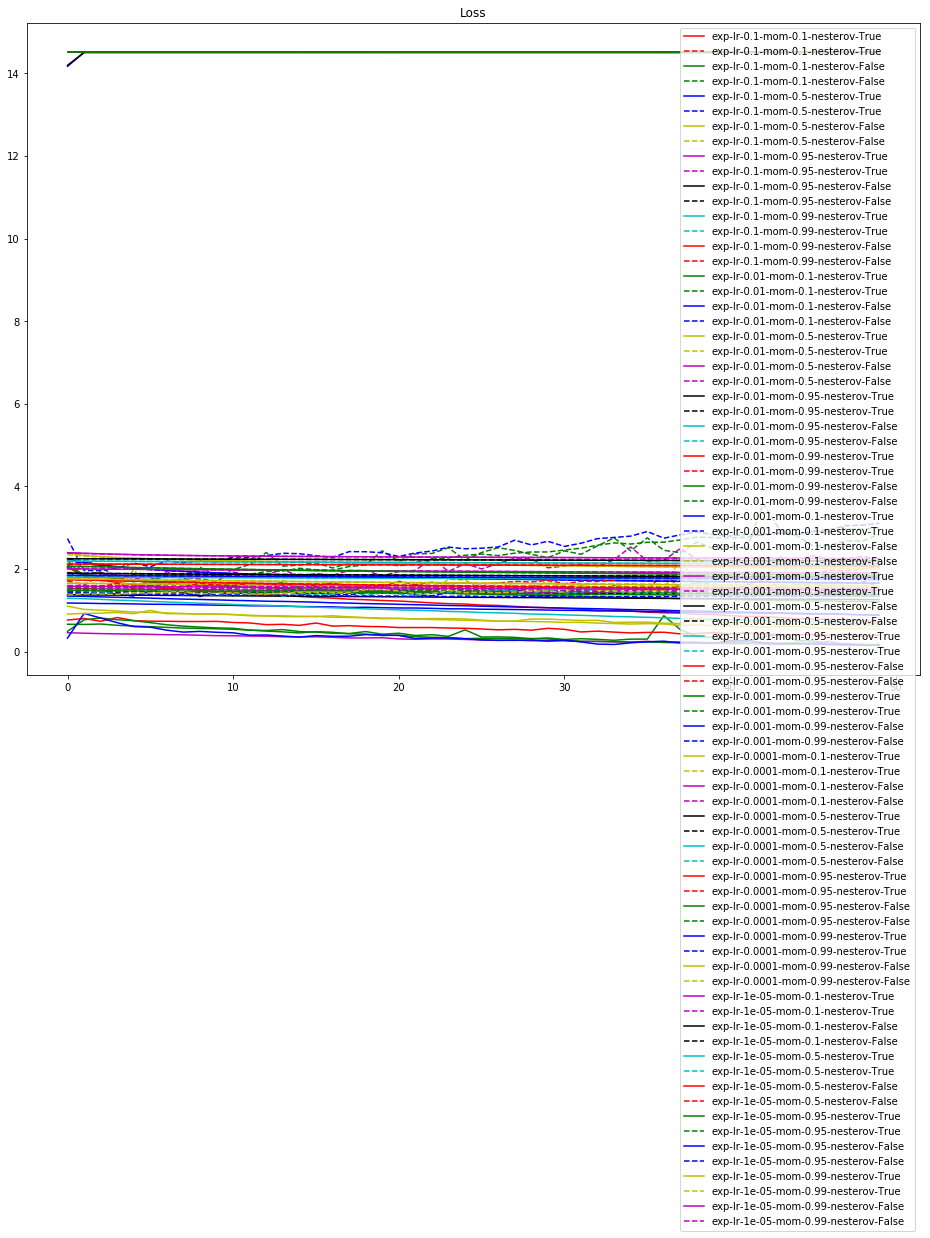

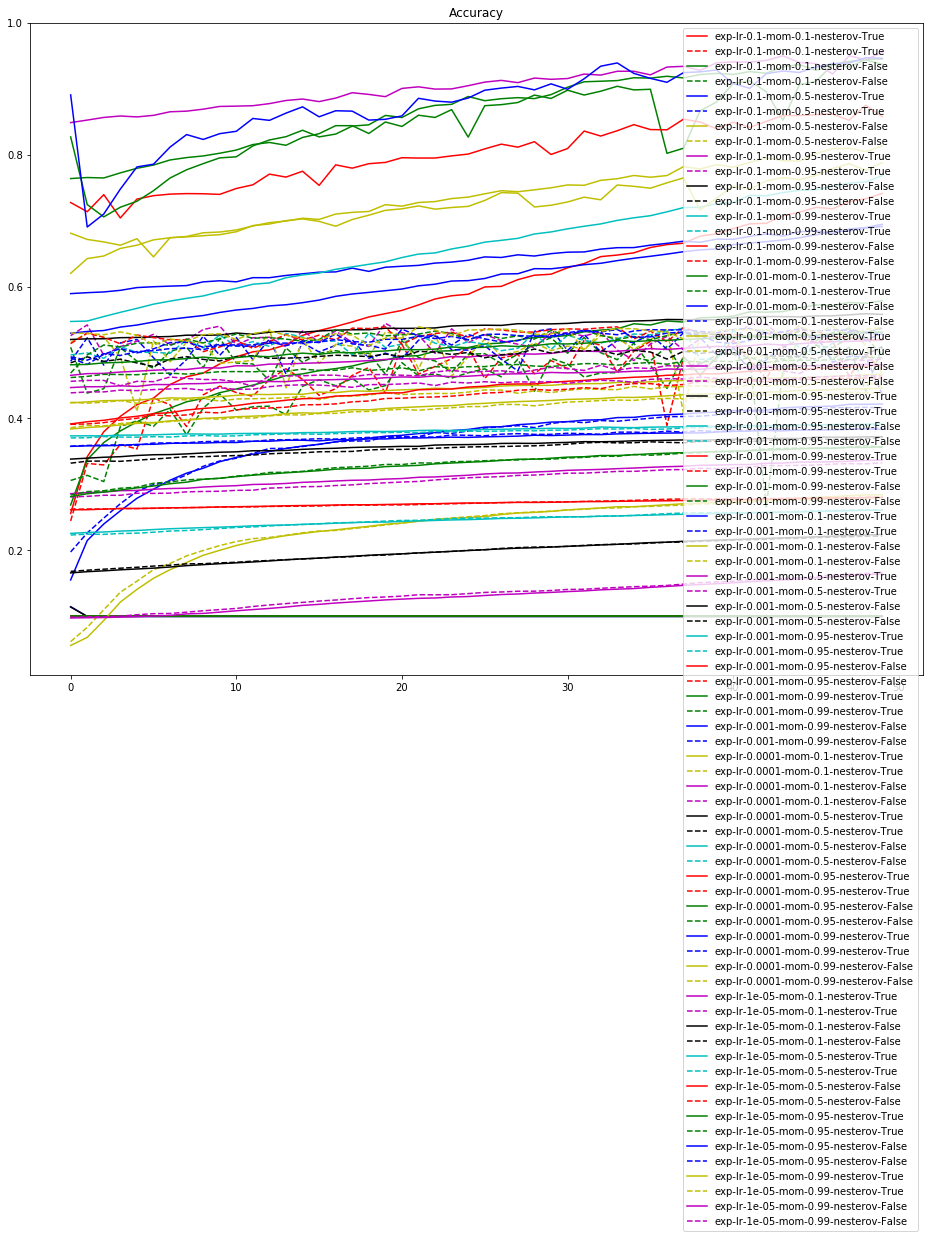

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k","c", "w"]

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i%(len(color_bar)-1)])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i%(len(color_bar)-1)])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(16,12))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i%(len(color_bar)-1)])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i%(len(color_bar)-1)])
plt.title("Accuracy")
plt.legend()
plt.show()